<a href="https://colab.research.google.com/github/PavanBorigi/FMML-22B21A42C2/blob/main/mod3_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad**
### MODULE: CLASSIFICATION-1
### LAB-4 : Understanding Cross-Validation and Standardization
#### Module Coordinator: Jashn Arora
---

# **Section 1: Tweaking the parameters**

Let's stat the lab by writing knn code on a cancer detection dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [3]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [4]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [5]:
X = cancer.data
y = cancer.target

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

## Section 1.1: Changing Value of K
Let's try to run the knn with different values of knn and compare the results

In [7]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

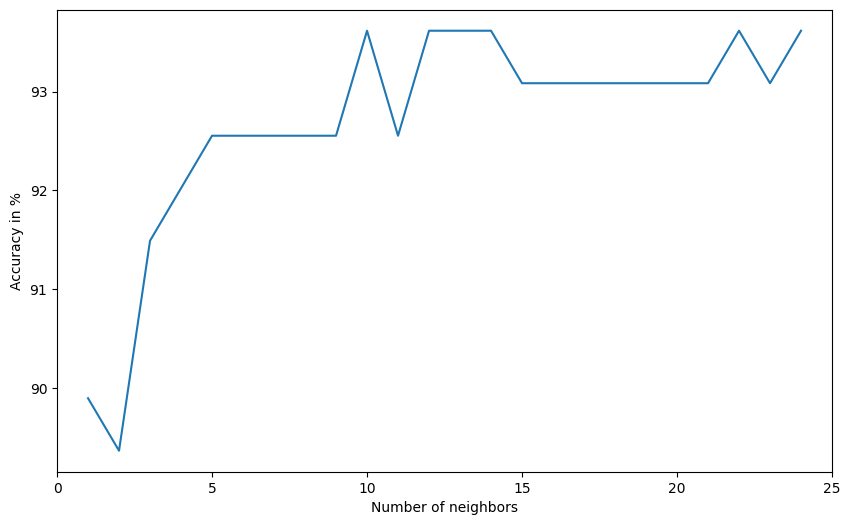

In [8]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [9]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


In this case, we see that the ideal number of neighbours can take any one of the values in the list [10,12,13,14,22,24].  
However, this only tells us the effectiveness of the KNN classifier only if we have the same train-test split considered above. It still does not tell us how well the algorithm would perform if the test set were different. The results would have been different if we had split the data differently.

### AUC-ROC Curve

The AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability.
It tells how much the model is capable of distinguishing between classes.  
The diagonal in the curve divides the ROC space. Points above the diagonal represent good classification results (better than random); points below the line represent bad results (worse than random).    
Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1.

The ROC curve is plotted with the TPR (True Positive Rate) on the y-axis, and the FPR (False Positive Rate) on the x-axis.

In [10]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

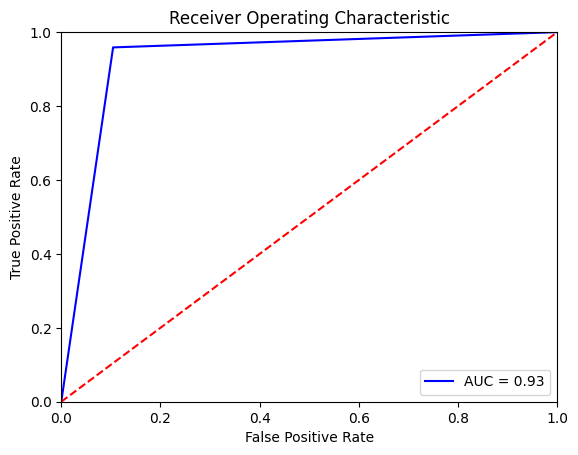

In [11]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

## Section 1.2: KNN using a different train-test split

In [12]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [13]:
# Scenario 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

# Scenario 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

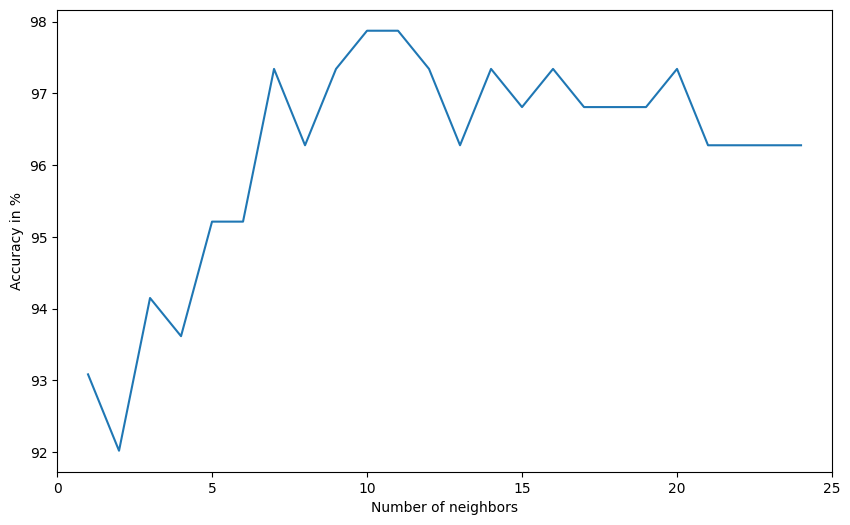

In [15]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [16]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

97.87234042553192
[10, 11]


In [17]:
# Scenario 1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

# Scenario 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# Assuming we have the following lists
Accuracy = [0.5, 0.6, 0.7, 0.6, 0.55]
neighbors = [3, 5, 7, 9, 11]

# Determine the maximum accuracy
max_acc = max(Accuracy)

# Find the k values where the accuracy is maximum
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]

print(max_acc)
print(optimal_ks)

0.7
[7]


As you can see, the model gives different results when we split the data differently. Here, it suggests that the ideal k value is 5, 7 or 8.

# **Section 2: Cross Validation**

As you saw in the above two cases with different train-test splits, there is a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance.  

Cross Validation is an important technique in Machine Learning to analyze the performance of a model on **unseen** data.  

There are different kinds of cross-validation methods: exhaustive and non-exhaustive.   
Exhaustive cross-validation methods are cross-validation methods which learn and test on all possible ways to divide the original sample into a training and a validation set.
Non-exhaustive cross validation methods do not compute all ways of splitting the original sample.

One of the most commonly cross-validation methods is **K-Fold Cross validation**. The procedure for K-Fold Cross Validation is as follows:  
1. Split the dataset into k groups (typically without shuffling)
2. For each unique group:  
  a. Take the group as a hold out or test data set  
  b. Take the remaining groups as a training data set  
  c. Fit a model on the training set and evaluate it on the test set  
  d. Retain the evaluation score and discard the model  
3. Summarize the performance of the model using the mean of model evaluation scores over all the folds.

Image source: https://scikit-learn.org/stable/modules/cross_validation.html  
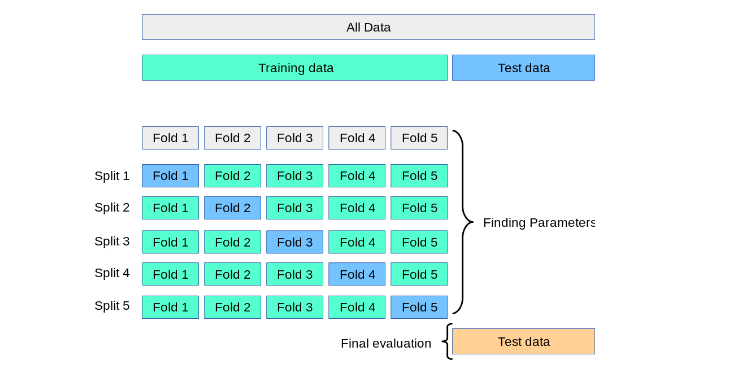

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [19]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

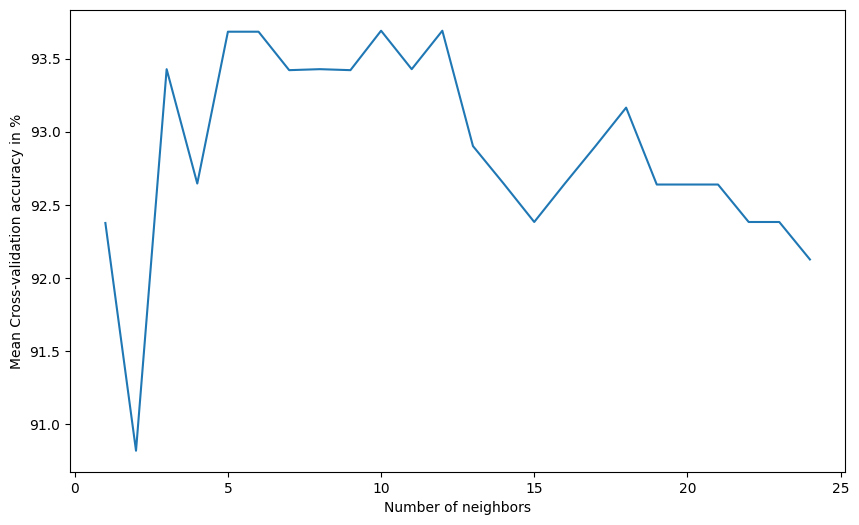

In [20]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [21]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


Note that the accuracy in the above case is not the accuracy on the test set. We plot the mean of the accuracies obtained during cross-validation, when we considered different splits of the training set.  

From the plot above, we can see that when the value of k is 10 or 12, our KNN model generalizes well to unseen data. Performing such cross validation gives us an idea about the parameters to choose when using a machine-learning algorithm.

In [22]:
## TASK-1:
## In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
## Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
## Implement Stratified KFold (refer Sklearn docs) and display the results you obtain

In [23]:
## TASK-1: ANSWER ##

from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
data = load_breast_cancer()
X = data.data
y = data.target
skf = StratifiedKFold(n_splits=5)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Fit the model
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predict the test set
    y_pred = clf.predict(X_test)

    # Compute the AUC score
    auc = roc_auc_score(y_test, y_pred)

    print(f"Fold AUC: {auc}")

Fold AUC: 0.9182771044873895
Fold AUC: 0.9231903046184081
Fold AUC: 0.9811507936507937
Fold AUC: 0.9573412698412699
Fold AUC: 0.9740107310529846


# **Section 3: Standardization**


Scaling the data that we have available is a recommended pre-processing step when working with many machine learning algorithms. The scale and distribution of the data drawn from the domain may be different for each variable. Differences in the scales across input variables may increase the difficulty of the problem being modeled, and the model may suffer from poor performance during learning and sensitivity to input values resulting in higher generalization error.  

Standardization (also called z-score normalization) is one such scaling technique that transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

$$ \text{New (scaled) value} = {X - \mu \over \sigma}$$


In [24]:
X = cancer.data
y = cancer.target

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [27]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

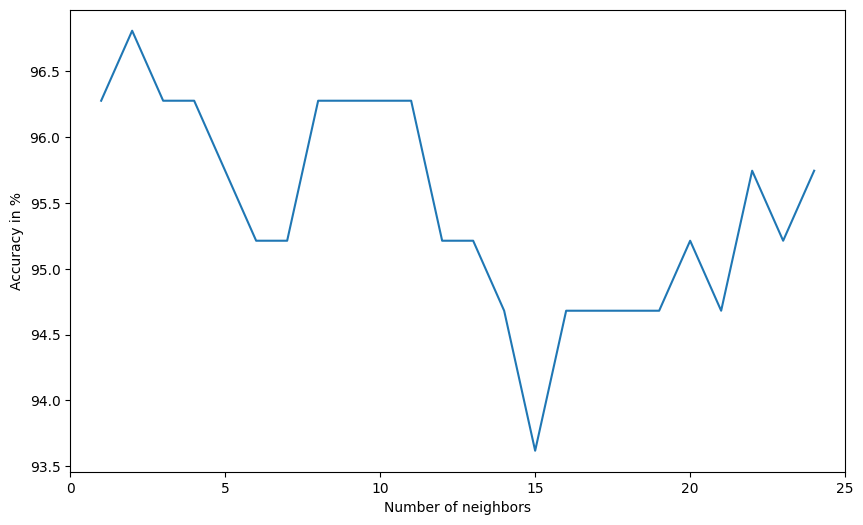

In [28]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [29]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


In [30]:
## TASK-2:
## Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
## Also print out the Precision, Recall and F1-score values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
[[0 0 0]
 [1 0 1]
 [0 0 0]]
Accuracy:  0.0
Precision:  0.0
Recall:  0.0
F1-score:  0.0


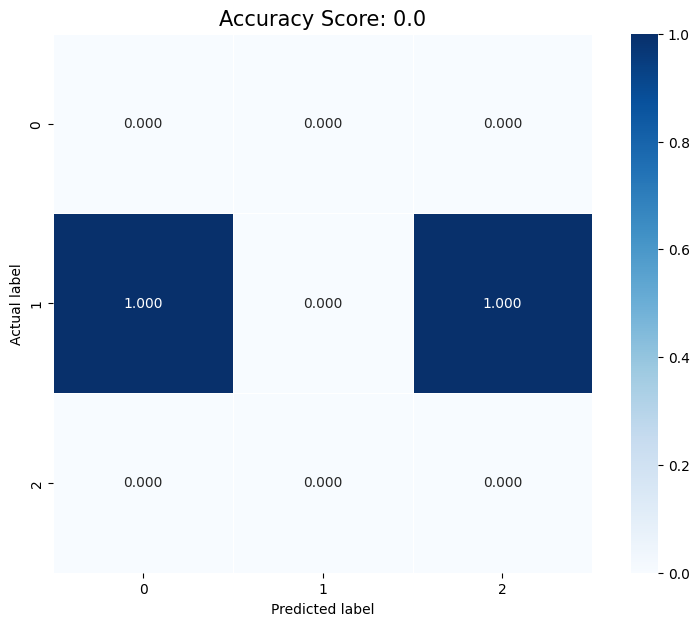

In [31]:
## TASK-2: ANSWER ##
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X is your feature set and y is your label set
X = [[-1.5, -0.5], [-1.5, 1.5], [-0.5, -0.5], [1.5, 1.5], [-1.5, -0.5], [1.5, -0.5], [1.5, 1.5], [-0.5, -0.5]]
y = [0, 1, 2, 2, 0, 1, 1, 2]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predict the labels for the testing set
y_pred = kmeans.predict(X_test)

# Calculate the confusion matrix, accuracy, precision, and recall for the predicted labels
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print('Confusion Matrix:')
print(cm)
print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1-score: ', f1)

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(title, size = 15)
plt.show()

In [32]:
## TASK-3:
## Perform K-Fold Cross validation after standardizing the data. Display your results.

In [ ]:

## TASK-3: ANSWER ##

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Fold Cross Validation
kfold = 10
model = LogisticRegression()
cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')

# Print results
print(f"Accuracy: {np.mean(cv_scores):.2f} (+/- {np.std(cv_scores):.2f})")

### Questions to Think About and Answer
1. Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.  
What do you think are the pros/cons of this method ?  
2. Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.

# QUESTION 1 ANSWER#
One approach to this is to perform cross-validation to assess the performance of a machine learning model. This technique allows us to avoid overfitting, which can occur when the model is too complex for the training data.

However, another alternative approach is to use a three-set split: train, validation, and test set. The main advantages of this method are:

***Controlled environment***: With a controlled validation set, we can check if our model generalizes well or not. This allows us to evaluate and refine our model.

***Extensive experimentation***: By keeping a separate test set, we can experiment with different models, feature selections, or model tuning parameters. This way, we can understand which combination performs best.

The main disadvantage of this method is that it requires a larger portion of the data to be reserved for validation and testing, reducing the size of the training set.

Here is a Python code snippet demonstrating how to perform cross-validation and three-set split:

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross Validation
kfold = 10
model = LogisticRegression()
cv_scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='accuracy')

# 3-set split (Train, Validation, Test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Now we can use the train and validation sets to train our model, and the test set to evaluate its performance.

#QUESTION 2 ANSWER#

K-Fold cross validation is a non-exhaustive cross validation method. This is because it divides the data into a number of 'folds' or 'buckets' and trains the model on some folds and tests on others. The number of folds, K, determines how many different subsets of the data are used for testing and training.

While this method can provide a more reliable estimate of model performance, it does not guarantee that every possible subset of the data will be used for training and testing. This means that some data points may not be used in every training and testing round.

On the other hand, exhaustive cross validation (also known as complete cross validation) uses every possible subset of the data for training and testing. This ensures that every data point is included in the training and testing process. However, this approach can be computationally expensive for large datasets.

In summary, K-Fold cross validation is a non-exhaustive method because it does not guarantee the use of every possible subset of the data. However, it provides a good balance between reliability and computational efficiency.

### Useful Resources for further reading
1. Cross validation (scikit-learn): https://scikit-learn.org/stable/modules/cross_validation.html  
2. Wikipedia: https://en.wikipedia.org/wiki/Cross-validation_(statistics)  
3. Standardization: https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/  
4. AUC-ROC : https://en.wikipedia.org/wiki/Receiver_operating_characteristic
